In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#to read the dataset
df=pd.read_csv("https://raw.githubusercontent.com/ankushbnayak/Loan-prediction-project/master/loan_train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<AxesSubplot:>

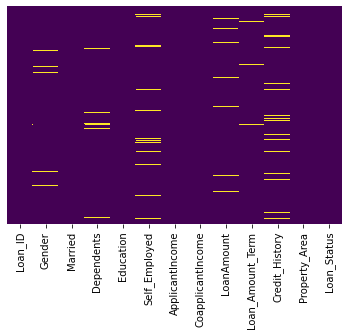

In [3]:
#Heat map showing values which are not available or null
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
sex = pd.get_dummies(df['Gender'],drop_first=True)

In [5]:
df.drop(['Gender','Loan_ID'],axis=1,inplace=True)
df = pd.concat([df,sex],axis=1)
df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male
0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1


In [6]:
married = pd.get_dummies(df['Married'],drop_first=True)
education = pd.get_dummies(df['Education'],drop_first=True)
df.drop(['Married','Education'],axis=1,inplace=True)
df = pd.concat([df,married,education],axis=1)
df.head()

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male,Yes,Not Graduate
0,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0,0
1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0
2,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,0
3,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,1
4,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0


In [7]:
df=df.rename(columns={'Yes':'Married','Male':'Gender'})
df.head()

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender,Married,Not Graduate
0,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0,0
1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0
2,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,0
3,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,1
4,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0


In [8]:
df=df.rename(columns={'Sf':'Self_Employed'})
df.head()

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender,Married,Not Graduate
0,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0,0
1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0
2,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,0
3,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,1
4,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0


In [9]:
self_emp = pd.get_dummies(df['Self_Employed'],drop_first=True)
df.drop(['Self_Employed'],axis=1,inplace=True)
df = pd.concat([df,self_emp],axis=1)
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender,Married,Not Graduate,Yes
0,0,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0,0,0
1,1,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0,0
2,0,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,1,0
4,0,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0,0


In [10]:
df=df.rename(columns={'Yes':'Self_Employed'})
df.head(20)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender,Married,Not Graduate,Self_Employed
0,0,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0,0,0
1,1,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0,0
2,0,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,1,0
4,0,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0,0
5,2,5417,4196.0,267.0,360.0,1.0,Urban,Y,1,1,0,1
6,0,2333,1516.0,95.0,360.0,1.0,Urban,Y,1,1,1,0
7,3+,3036,2504.0,158.0,360.0,0.0,Semiurban,N,1,1,0,0
8,2,4006,1526.0,168.0,360.0,1.0,Urban,Y,1,1,0,0
9,1,12841,10968.0,349.0,360.0,1.0,Semiurban,N,1,1,0,0


<AxesSubplot:>

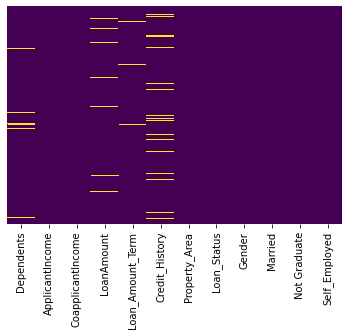

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

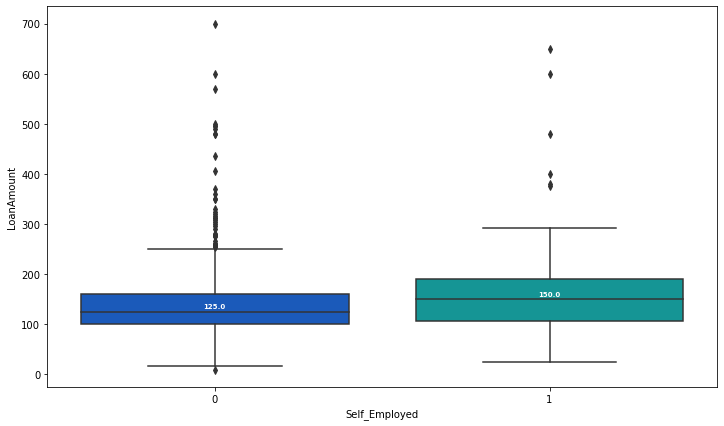

In [12]:
plt.figure(figsize=(12, 7))
bx=sns.boxplot(x='Self_Employed',y='LoanAmount',data=df,palette='winter')
medians=df.groupby(['Self_Employed'])['LoanAmount'].median()
vertical_offset=df['LoanAmount'].median() * 0.05
for xtick in bx.get_xticks():
    bx.text(xtick,medians[xtick]+vertical_offset,medians[xtick],horizontalalignment='center',size='x-small',color='w',weight='semibold')

In [13]:
def impute_LoanAmt(cols):
    Loan = cols[0]
    selfemp = cols[1]
    
    if pd.isnull(Loan):

        if selfemp == 1:
            return 150
        else:
            return 125

    else:
        return Loan

<AxesSubplot:>

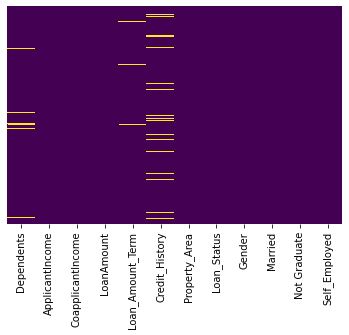

In [14]:
df['LoanAmount'] = df[['LoanAmount','Self_Employed']].apply(impute_LoanAmt,axis=1)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

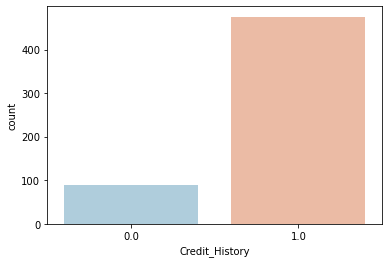

In [15]:
sns.countplot(x='Credit_History',data=df,palette='RdBu_r')

<AxesSubplot:>

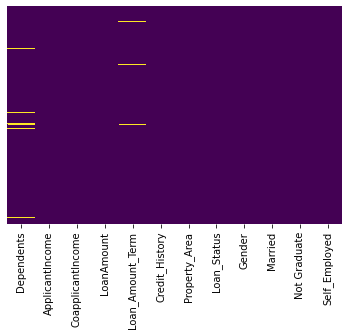

In [16]:
df['Credit_History'].fillna(1.0,inplace=True)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

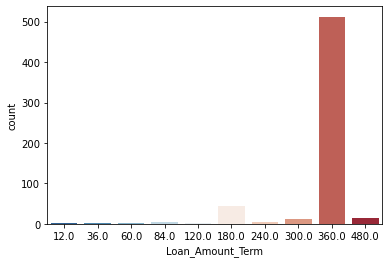

In [17]:
sns.countplot(x='Loan_Amount_Term',data=df,palette='RdBu_r')

<AxesSubplot:>

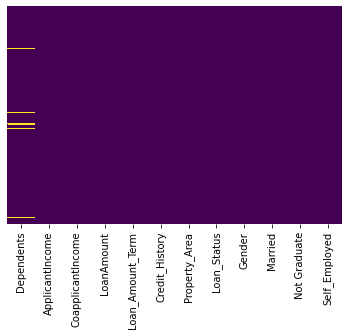

In [18]:
df['Loan_Amount_Term'].fillna(360.0,inplace=True)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Dependents', ylabel='count'>

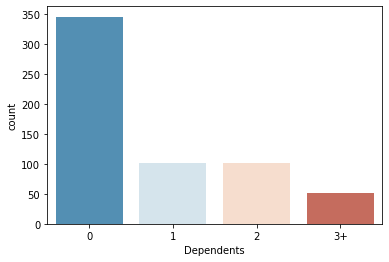

In [19]:
sns.countplot(x='Dependents',data=df,palette='RdBu_r')

<AxesSubplot:>

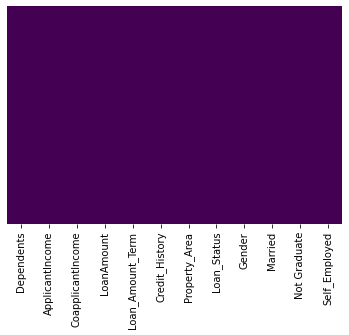

In [20]:
df['Dependents'].fillna(0,inplace=True)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
loanStatus = pd.get_dummies(df['Loan_Status'],drop_first=True)
df.drop(['Loan_Status'],axis=1,inplace=True)
df = pd.concat([df,loanStatus],axis=1)
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender,Married,Not Graduate,Self_Employed,Y
0,0,5849,0.0,125.0,360.0,1.0,Urban,1,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,Rural,1,1,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,Urban,1,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,Urban,1,1,1,0,1
4,0,6000,0.0,141.0,360.0,1.0,Urban,1,0,0,0,1


In [22]:
PropArea = pd.get_dummies(df['Property_Area'],drop_first=True)
df.drop(['Property_Area'],axis=1,inplace=True)
df = pd.concat([df,PropArea],axis=1)
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Not Graduate,Self_Employed,Y,Semiurban,Urban
0,0,5849,0.0,125.0,360.0,1.0,1,0,0,0,1,0,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,1,0,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,1,0,1


In [23]:
df=df.rename(columns={'Y':'Loan_Status'})

In [24]:
df=df.replace(to_replace='3+',value=3)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train=pd.DataFrame(df.drop('Loan_Status',axis=1))
scaler.fit(train)
scaled_features = scaler.transform(train)
df_feat = pd.DataFrame(scaled_features,columns=train.columns)
df_feat.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Not Graduate,Self_Employed,Semiurban,Urban
0,-0.737806,0.072991,-0.554487,-0.247076,0.273231,0.411733,0.505592,-1.357421,-0.528362,-0.392601,-0.782016,1.428147
1,0.253470,-0.134412,-0.038732,-0.211384,0.273231,0.411733,0.505592,0.736691,-0.528362,-0.392601,-0.782016,-0.700208
2,-0.737806,-0.393747,-0.554487,-0.949028,0.273231,0.411733,0.505592,0.736691,-0.528362,2.547117,-0.782016,1.428147
3,-0.737806,-0.462062,0.251980,-0.306564,0.273231,0.411733,0.505592,0.736691,1.892641,-0.392601,-0.782016,1.428147
4,-0.737806,0.097728,-0.554487,-0.056717,0.273231,0.411733,0.505592,-1.357421,-0.528362,-0.392601,-0.782016,1.428147


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Loan_Status'],
                                                    test_size=0.30)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 31  30]
 [ 11 113]]
              precision    recall  f1-score   support

           0       0.74      0.51      0.60        61
           1       0.79      0.91      0.85       124

    accuracy                           0.78       185
   macro avg       0.76      0.71      0.72       185
weighted avg       0.77      0.78      0.77       185



In [30]:
knn.predict([X_test[0]])
X_test[0]

array([ 0.25346957, -0.18355953,  0.47155202,  0.31210565, -4.01407133,
        0.41173269,  0.50559245,  0.73669096, -0.52836225, -0.39260074,
       -0.7820157 , -0.70020801])

In [32]:
features=np.array([1,0,3,1,4000,3000,0,1,360,1.0])
features = scaler.fit_transform(features.reshape(-1, 1))
features=features.flatten()
features

array([-0.52413336, -0.52484579, -0.52270851, -0.52413336,  2.32486667,
        1.61243855, -0.52484579, -0.52413336, -0.26837167, -0.52413336])

In [33]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

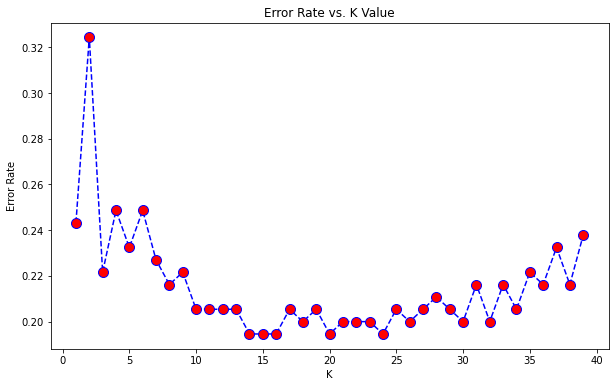

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [35]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [36]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 30  31]
 [  7 117]]
              precision    recall  f1-score   support

           0       0.81      0.49      0.61        61
           1       0.79      0.94      0.86       124

    accuracy                           0.79       185
   macro avg       0.80      0.72      0.74       185
weighted avg       0.80      0.79      0.78       185



In [37]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

0.7945945945945946


In [38]:
df['Dependents'] = pd.to_numeric(df['Dependents'])

In [39]:
df.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married',
       'Not Graduate', 'Self_Employed', 'Loan_Status', 'Semiurban', 'Urban'],
      dtype='object')

In [40]:
x=df[['Married', 'Not Graduate', 'Dependents',
       'Self_Employed','ApplicantIncome','CoapplicantIncome','Semiurban','Urban','Loan_Amount_Term','Credit_History']]
y=df['LoanAmount']

In [41]:
X_train,X_test,Y_train,Y_test=train_test_split(x.values,y.values,test_size=0.3,random_state=101)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [44]:
print(lm.intercept_)

55.508996866131696


In [46]:
coeff=pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff

,Coefficient
Married,20.641931
Not Graduate,-17.026395
Dependents,10.201953
Self_Employed,14.170060
ApplicantIncome,0.006799
CoapplicantIncome,0.006619
Semiurban,-7.765598
Urban,-11.591580
Loan_Amount_Term,0.089799
Credit_History,-1.739083


In [47]:
pred1=lm.predict(X_test)

In [48]:
from sklearn.metrics import max_error,explained_variance_score,mean_absolute_error
print(max_error(Y_test,pred1))
print(explained_variance_score(Y_test,pred1))
print(mean_absolute_error(Y_test,pred1))

413.4349934625824
0.3214675018091674
41.80180776123255


In [49]:
dfx = pd.DataFrame({

   'Original': Y_test,

   'Predicted': pred1

   })

In [50]:
lm.predict([[1,0,3,1,4000,3000,0,1,360,1.0]])

array([186.97891948])

In [51]:
from sklearn import linear_model

In [52]:
bm=linear_model.BayesianRidge()
bm.fit(X_train,Y_train)

BayesianRidge()

In [53]:
pred2=bm.predict(X_test)

In [54]:
coeff2=pd.DataFrame(bm.coef_,x.columns,columns=['Coefficient'])
coeff2

,Coefficient
Married,2.843843e-05
Not Graduate,-1.198853e-05
Dependents,6.220559e-05
Self_Employed,8.655873e-06
ApplicantIncome,7.298739e-03
CoapplicantIncome,6.777225e-03
Semiurban,6.237917e-07
Urban,-9.444087e-06
Loan_Amount_Term,1.483196e-03
Credit_History,-1.084215e-06


In [55]:
bm.predict([[1,0,3,1,4000,3000,0,1,360,1.0]])

array([143.98938586])

In [56]:
print(max_error(Y_test,pred2))
print(explained_variance_score(Y_test,pred2))
print(mean_absolute_error(Y_test,pred2))

408.17309929462266
0.3608376986165531
40.40674500101228


In [57]:
from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [58]:
yhat = model.predict([[1,0,3,1,4000,3000,0,1,360,1.0]])
print('Predicted: %.3f' % yhat)

Predicted: 165.541


In [59]:
pred3=model.predict(X_test)

In [60]:
print(explained_variance_score(Y_test,pred3))
print(max_error(Y_test,pred3))

0.12204139179613394
508.32869720458984


In [61]:
 from sklearn.ensemble import RandomForestRegressor
 regr = RandomForestRegressor(max_depth=2, random_state=0)
 regr.fit(X_train,Y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [62]:
regr.predict([[1,0,3,1,4000,3000,0,1,360,1.0]])

array([123.46250175])

In [63]:
pred4=regr.predict(X_test)

In [64]:
print(explained_variance_score(Y_test,pred4))
print(max_error(Y_test,pred4))

0.41044459436904535
295.2034414641407
